In [68]:
# PART 1

# downloading packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# downloading clean dataset
# importing the dataset
clean_smoking = pd.read_csv("C:/Users/justi/Introduction-to-Python-S1-M1/Python-Introduction-Smoking-Prevalence/data/clean/clean_smoking_df.csv")
clean_educ =pd.read_csv("C:/Users/justi/Introduction-to-Python-S1-M1/Python-Introduction-Smoking-Prevalence/data/clean/clean_educ_df.csv")
clean_smoking.head()


,Unnamed: 0,structure_name,age,sex,unit_of_measure,geo,time_period,obs_value
0,0,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Austria,2023,25
1,1,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Belgium,2023,15
2,2,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Bulgaria,2023,27
3,3,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Cyprus,2023,24
4,4,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Czechia,2023,21


In [76]:
# PART 2:regression of smoking prevalence on sex

# preparing data

clean_smoking.head()
clean_smoking.isnull().sum()
clean_smoking.head()

,Unnamed: 0,structure_name,age,sex,unit_of_measure,geo,time_period,obs_value,sex_binary
0,0,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Austria,2023,25,0
1,1,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Belgium,2023,15,0
2,2,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Bulgaria,2023,27,0
3,3,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Cyprus,2023,24,0
4,4,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Czechia,2023,21,0


In [77]:
# subset sex variable

clean_smoking['sex_binary'] = clean_smoking['sex'].map({'Females': 0,
                                                        'Males': 1})
clean_smoking['sex_binary'] = pd.to_numeric(clean_smoking['sex_binary'],errors='coerce')
clean_smoking.head()


,Unnamed: 0,structure_name,age,sex,unit_of_measure,geo,time_period,obs_value,sex_binary
0,0,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Austria,2023,25,0
1,1,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Belgium,2023,15,0
2,2,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Bulgaria,2023,27,0
3,3,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Cyprus,2023,24,0
4,4,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Czechia,2023,21,0


In [78]:
# set the variables

X = clean_smoking[['sex_binary']]  # independent variable(s)
y = clean_smoking['obs_value']   # dependent variable
print(X)


    sex_binary
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           1
29           1
30           1
31           1
32           1
33           1
34           1
35           1
36           1
37           1
38           1
39           1
40           1
41           1
42           1
43           1
44           1
45           1
46           1
47           1
48           1
49           1
50           1
51           1
52           1
53           1
54           1
55           1


In [ ]:
# Create and fit the model

model = LinearRegression()
model.fit(X, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [80]:
# Display the model parameters
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficient (β₁): {model.coef_[0]:.2f}")


Intercept (β₀): 20.00
Coefficient (β₁): 9.54


In [101]:
#PART 3: the scatter plot

# preparing the dataset
filtered_clean_smoking=clean_smoking[clean_smoking["time_period"]==2023]
plot= (filtered_clean_smoking.groupby(["geo","sex_binary"])["obs_value"].mean().reset_index())
plot= plot.pivot(index="geo", columns="sex_binary", values="obs_value")


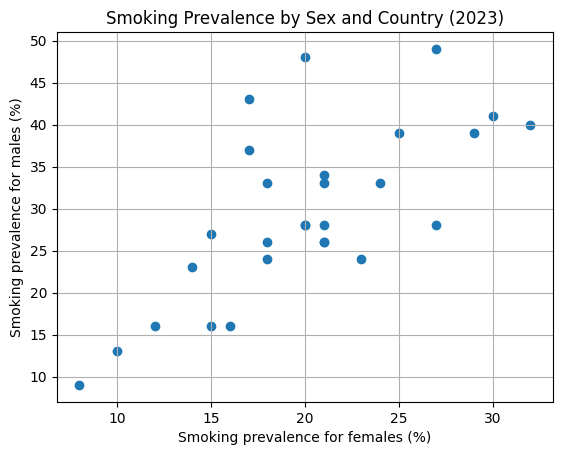

In [109]:
# doing the graph
plt.scatter(female["obs_value"],male["obs_value"])
plt.xlabel("Smoking prevalence for females (%)")
plt.ylabel("Smoking prevalence for males (%)")
plt.title("Smoking Prevalence by Sex and Country (2023)")
plt.grid(True)
